In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Open the CUES temperature data files, and concatenate them together

In [12]:
cues_temp_files = [ r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\CUES_data\2017-03-01-2017-03-31-Temperature-CUES.csv',
                   r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\CUES_data\2017-04-01-2017-04-15-Temperature-CUES.csv',
                   r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\CUES_data\2017-04-16-2017-04-30-Temperature-CUES.csv'
                  ]

cues_temp_data = []
_ = [cues_temp_data.append(pd.read_csv(i)) for i in cues_temp_files]
cues_temp_data = pd.concat(cues_temp_data)

Open the CUES radiation data file

In [14]:
cues_rad_file = r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\CUES_data\2017-03-01-2017-04-30-Radiation-CUES.csv'
cues_rad_data = pd.read_csv(cues_rad_file)

Convert the 'DateTime' text strings to pandas datetime objects

In [26]:
cues_temp_data['datetime']  = pd.to_datetime(cues_temp_data['MeasDateTime'])
cues_rad_data['datetime']  = pd.to_datetime(cues_rad_data['MeasDateTime'])

Look at all the keys (column headers)

In [29]:
print(cues_rad_data.keys())
print(cues_temp_data.keys())

Index(['MeasDateTime',
       'upward looking solar radiation; uplooking Eppley Lab precision spectral pyranometer; (Watts/meter^2)',
       'upward looking near-IR radiation; uplooking Eppley Lab precision spectral pyranometer w/ IR filter; (Watts/meter^2)',
       'downward looking solar radiation; downlooking Eppley Lab precision spectral pyranometer; (Watts/meter^2)',
       'downward looking clear solar  Bunker; downlooking Eppley Lab precision spectral pyranometer; (Watts/meter^2)',
       'downward looking near-IR radiation; downlooking Eppley Lab precision spectral pyranometer w/ IR filter; (Watts/meter^2)',
       'downward looking red solar  Bunker; downlooking Eppley Lab precision spectral pyranometer w/ IR filter; (Watts/meter^2)',
       'upward looking longwave radiation; uplooking Eppley lab precision infrared long wave radiometer; (Watts/meter^2)',
       'Upward Looking longwave voltage; uplooking Eppley lab precision infrared long wave radiometer; (millivolts)',
     

Set start and end dates for time period we want to look at

In [39]:
startdate = pd.datetime(2017,3,1)
enddate = pd.datetime(2017,4,1)

Plot some of these values within this time window

(736389.0, 736420.0)

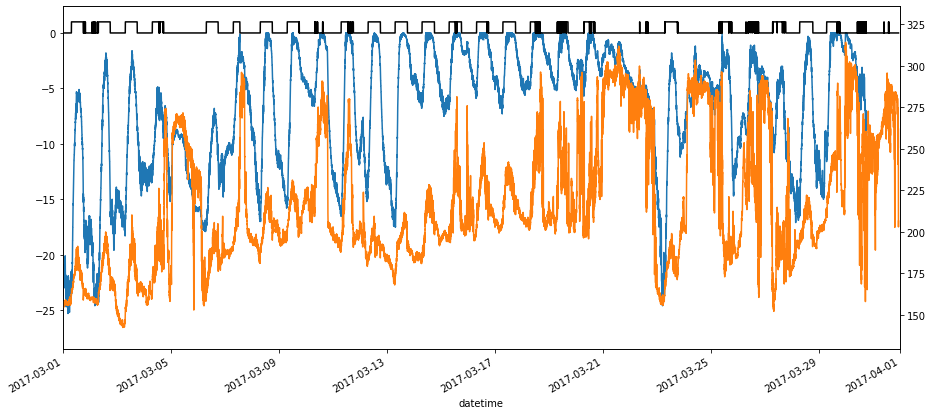

In [50]:
fig, ax = plt.subplots(figsize=(15,7))
cues_temp_data.plot(x='datetime',y='snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)', 
                    c='tab:blue', ax=ax, legend=False)
ax2 = ax.twinx()
cues_rad_data.plot(x='datetime',y='upward looking longwave radiation; uplooking Eppley lab precision infrared long wave radiometer; (Watts/meter^2)',
                   c='tab:orange', ax=ax2, legend=False)

cues_rad_data.plot(x='datetime',y='SUN flag; uplooking Sunshine pyranometer  direct and diffuse; (bit)', 
                    c='k', ax=ax, legend=False)

ax.set_xlim([startdate,enddate])